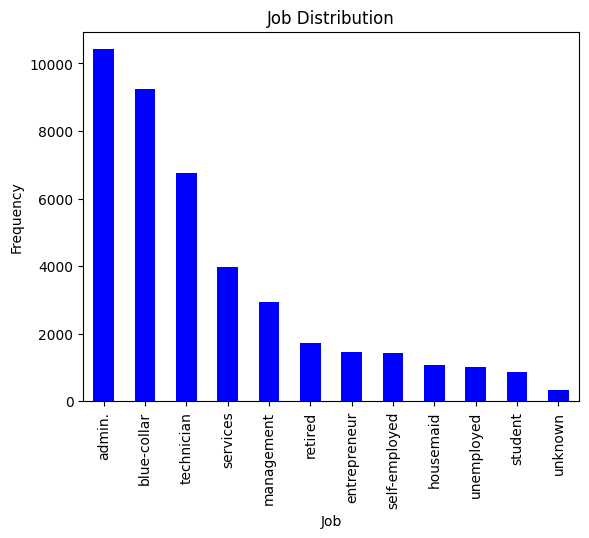

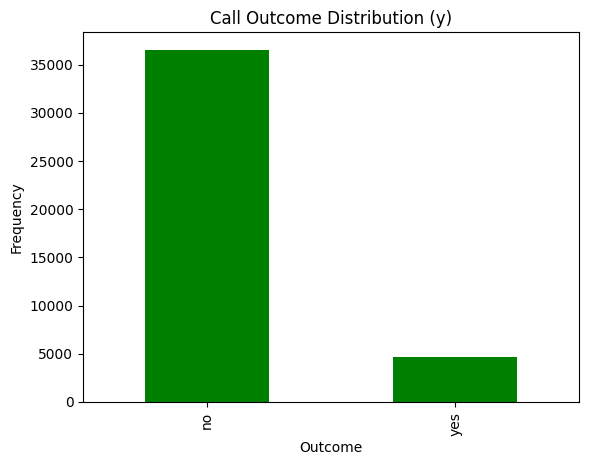

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read and Visualize the Data
try:
    Mydata = pd.read_csv("bank-additional.csv", sep=";")
except FileNotFoundError:
    print("The file 'bank-additional.csv' was not found. Please check the path and file name.")

# Plot the 'job' variable
Mydata['job'].value_counts().plot(kind='bar', color='blue')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

# Plot the call outcome variable 'y'
Mydata['y'].value_counts().plot(kind='bar', color='green')
plt.title('Call Outcome Distribution (y)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()


In [11]:
# 2. Remove Unnecessary Variable
Mydata = Mydata.drop(columns=['duration'])

In [12]:
# 3. Split the Data into Training and Validation Sets
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42)

In [13]:
# Encode categorical variables
X_train = pd.get_dummies(Train.drop(columns=['y']))  # Features
y_train = Train['y']

X_val = pd.get_dummies(Val.drop(columns=['y']))
y_val = Val['y']

# Align train and validation sets to avoid any issues with dummy variables
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

mtree = DecisionTreeClassifier(random_state=42)
mtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

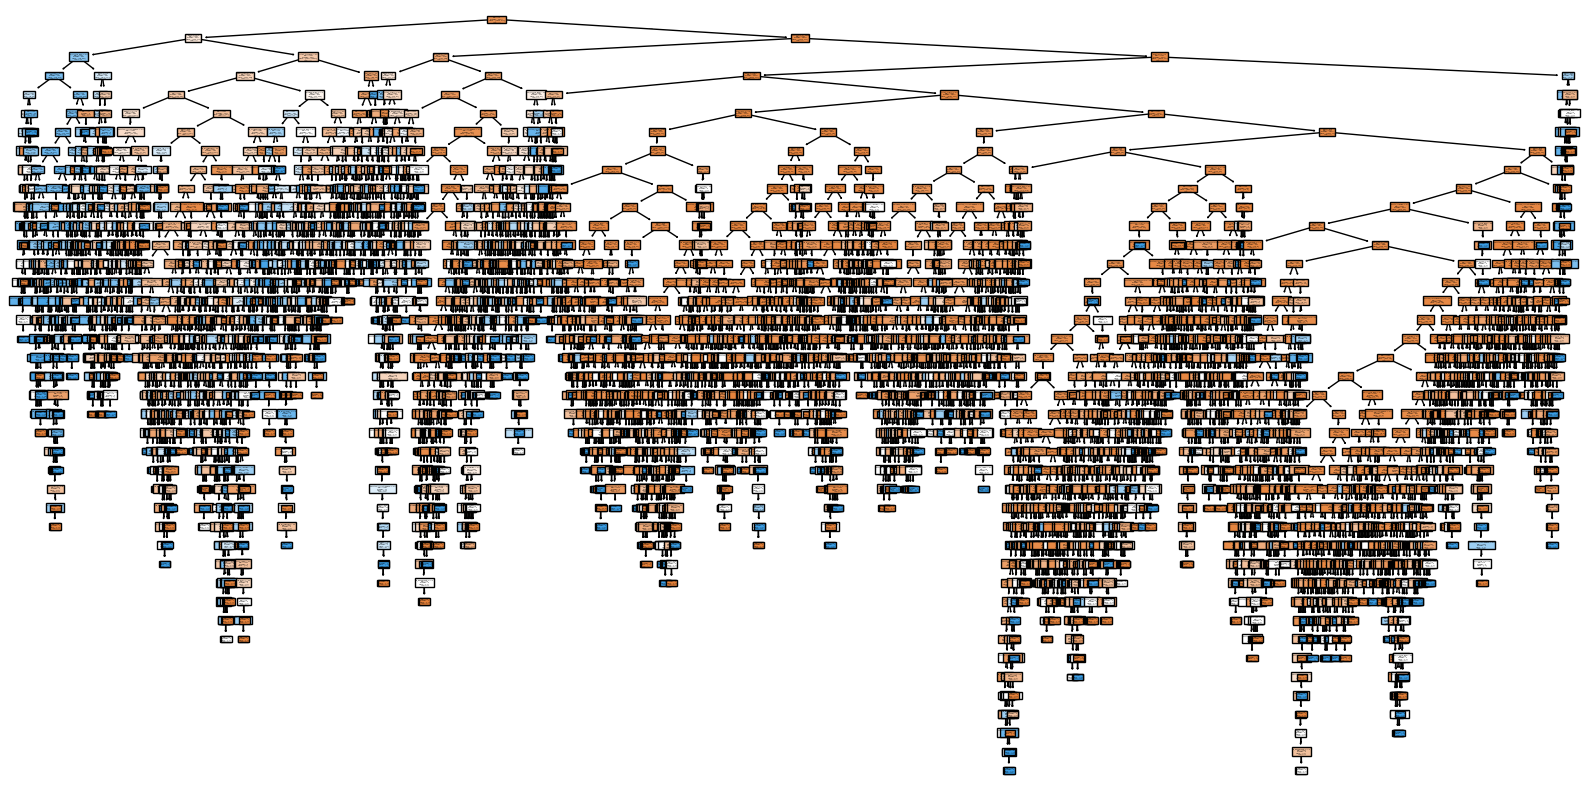

In [14]:
# 5. Display and Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(mtree, feature_names=X_train.columns, class_names=mtree.classes_, filled=True)
plt.show()

In [15]:
# 6. Evaluate the Model on the Validation Set
Yt = mtree.predict(X_val)
conf_matrix = confusion_matrix(y_val, Yt, labels=mtree.classes_)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[6601  702]
 [ 615  320]]


In [16]:
# 7. Calculate Performance Metrics
ac = accuracy_score(y_val, Yt)
tp = conf_matrix[1, 1] / sum(conf_matrix[1, :])  # True positive rate (assuming 1 is the positive class)
tn = conf_matrix[0, 0] / sum(conf_matrix[0, :])  # True negative rate (assuming 0 is the negative class)

print("Accuracy:", ac)
print("True Positive Rate (TP):", tp)
print("True Negative Rate (TN):", tn)

Accuracy: 0.8401310997815004
True Positive Rate (TP): 0.3422459893048128
True Negative Rate (TN): 0.9038751198137751


In [17]:
# 8. Calculate False Positive and Negative Rates
fp = conf_matrix[0, 1] / sum(conf_matrix[0, :])  # False positive rate
fn = conf_matrix[1, 0] / sum(conf_matrix[1, :])  # False negative rate

print("False Positive Rate (FP):", fp)
print("False Negative Rate (FN):", fn)

False Positive Rate (FP): 0.09612488018622484
False Negative Rate (FN): 0.6577540106951871


In [18]:
# Handle missing values by imputing or dropping (if necessary)
Mydata = Mydata.dropna()  # Simple approach: drop rows with any missing values
# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})
# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)
# Stratified split to maintain the same distribution of 'y' in both train and validation sets
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42, stratify=Mydata['y'])


In [19]:
# Stratified split to maintain the same distribution of 'y' in both train and validation sets
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42, stratify=Mydata['y'])


In [20]:
from sklearn.model_selection import cross_val_score

# Cross-validation for more robust model evaluation
mtree = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(mtree, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.83748103 0.83915023 0.8447648  0.85037936 0.84430956]
Mean CV Accuracy: 0.8432169954476478


In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(mtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_mtree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


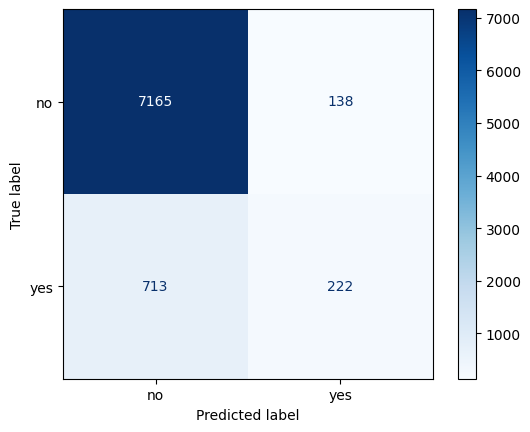

Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.62      0.24      0.34       935

    accuracy                           0.90      8238
   macro avg       0.76      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Evaluate on the validation set
Yt = best_mtree.predict(X_val)
conf_matrix = confusion_matrix(y_val, Yt)

# Enhanced confusion matrix visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_mtree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# More detailed performance metrics
print("Classification Report:\n", classification_report(y_val, Yt))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Handle missing values (if any)
Mydata = Mydata.dropna()

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])


In [25]:
# Stratified split to maintain the same distribution of 'y' in both train and validation sets
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42, stratify=Mydata['y'])

# Features and target separation
X_train = Train.drop(columns=['y'])
y_train = Train['y']

X_val = Val.drop(columns=['y'])
y_val = Val['y']


In [26]:
# Initialize the Random Forest model
rforest = RandomForestClassifier(random_state=42, n_jobs=-1)

# Cross-validation to evaluate the model
cv_scores = cross_val_score(rforest, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.892261   0.8908953  0.89256449 0.88892261 0.88877086]
Mean CV Accuracy: 0.8906828528072838


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Random Forest Model
rforest = RandomForestClassifier(random_state=42, n_jobs=-1)
rforest.fit(X_train, y_train)
# 4. Evaluate the Model
Yt = rforest.predict(X_val)
conf_matrix = confusion_matrix(y_val, Yt)
accuracy = accuracy_score(y_val, Yt)
# Print Random Forest results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[7073  230]
 [ 660  275]]
Accuracy: 0.891964068948774


Confusion Matrix:
 [[7073  230]
 [ 660  275]]
Total Cost: 35300


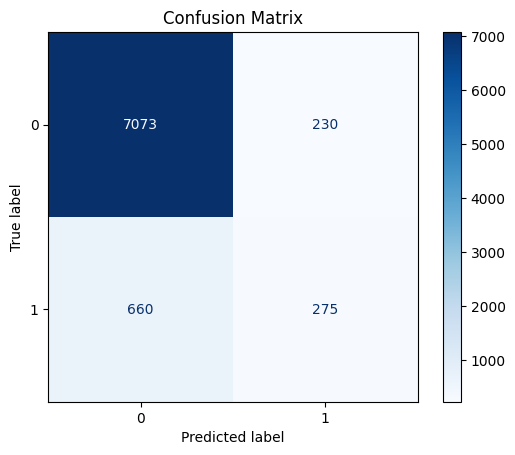

Accuracy: 0.891964068948774


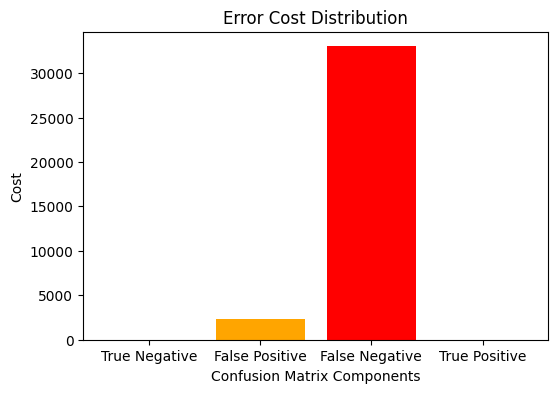

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Random Forest Model
rforest = RandomForestClassifier(random_state=42, n_jobs=-1)
rforest.fit(X_train, y_train)

# 4. Make Predictions
Yt = rforest.predict(X_val)

# 5. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)

# 6. Define the Cost Matrix
# Cost Matrix: [ [TN_cost, FP_cost], [FN_cost, TP_cost] ]
cost_matrix = np.array([[0, 10], [50, 0]])

# Calculate Total Cost
total_cost = np.sum(conf_matrix * cost_matrix)
print("Total Cost:", total_cost)

# 7. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rforest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Calculate and Print Accuracy
accuracy = accuracy_score(y_val, Yt)
print("Accuracy:", accuracy)

# 9. Visualize Error Costs
plt.figure(figsize=(6, 4))
costs = conf_matrix * cost_matrix
plt.bar(['True Negative', 'False Positive', 'False Negative', 'True Positive'], costs.flatten(), color=['blue', 'orange', 'red', 'green'])
plt.title('Error Cost Distribution')
plt.xlabel('Confusion Matrix Components')
plt.ylabel('Cost')
plt.show()


Confusion Matrix:
 [[6727  576]
 [ 507  428]]


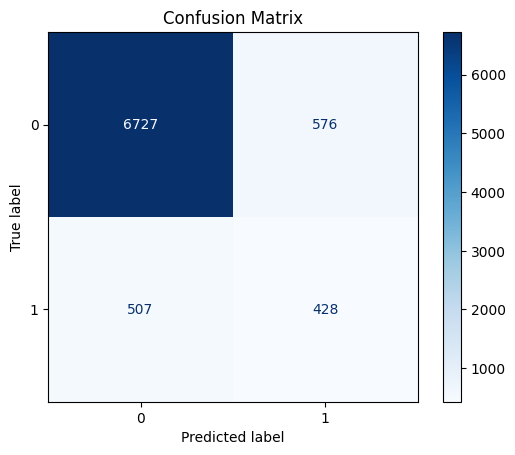

Accuracy: 0.8685360524399126
Precision: 0.4262948207171315
Recall: 0.4577540106951872


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


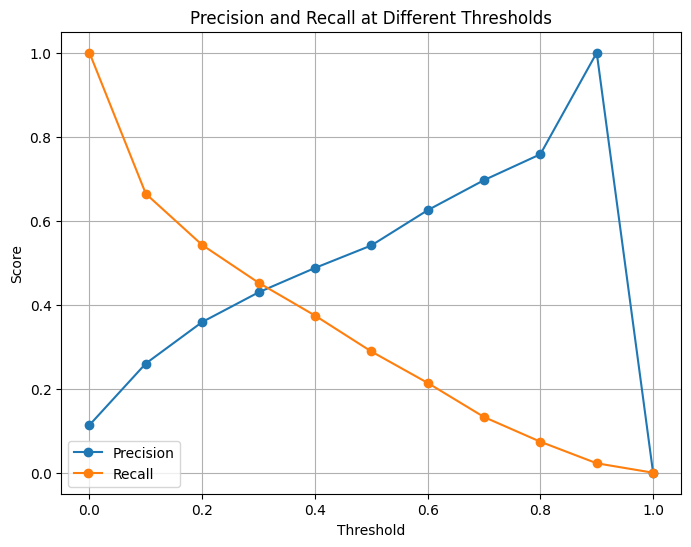

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Random Forest Model with Class Weights
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rforest.fit(X_train, y_train)

# 4. Make Predictions with Threshold Tuning
# Predict probabilities instead of classes
y_proba = rforest.predict_proba(X_val)[:, 1]

# Adjust the threshold for more positive predictions
threshold = 0.3  # Lower threshold means more positives predicted
Yt = (y_proba >= threshold).astype(int)

# 5. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)

# 6. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rforest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 7. Calculate and Print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_val, Yt)
precision = precision_score(y_val, Yt)
recall = recall_score(y_val, Yt)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# 8. Visualize the Impact of Threshold on Precision and Recall
thresholds = np.arange(0.0, 1.1, 0.1)
precisions = []
recalls = []
for t in thresholds:
    Yt_temp = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_val, Yt_temp))
    recalls.append(recall_score(y_val, Yt_temp))
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8969410050983249


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


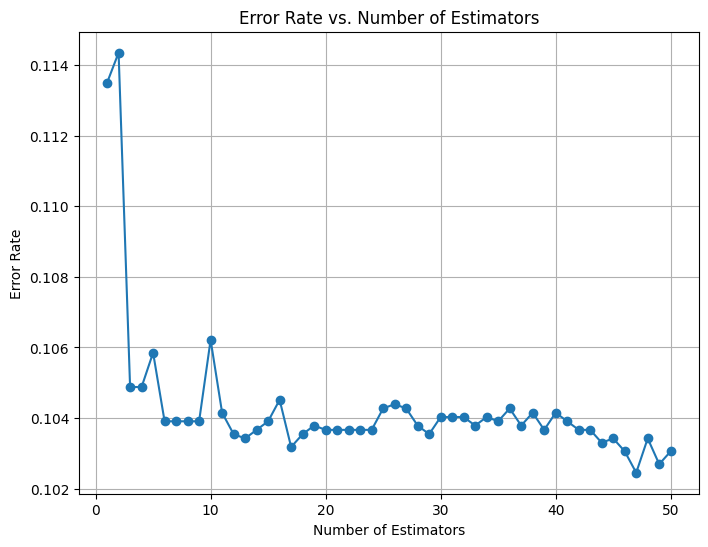

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the AdaBoost Model with Decision Trees as Weak Learners
# Here, we use DecisionTreeClassifier with max_depth=1 as weak classifiers
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada_boost.fit(X_train, y_train)

# 4. Make Predictions
Yt = ada_boost.predict(X_val)


# 7. Calculate and Print Accuracy
accuracy = accuracy_score(y_val, Yt)
print("Accuracy:", accuracy)

# 8. Visualize the AdaBoost Model's Error Rate vs. Number of Estimators
n_estimators = range(1, ada_boost.n_estimators + 1)
errors = [1 - accuracy_score(y_val, pred) for pred in ada_boost.staged_predict(X_val)]

plt.figure(figsize=(8, 6))
plt.plot(n_estimators, errors, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Estimators')
plt.grid(True)
plt.show()


Linear Regression - Mean Squared Error: 64.20
Linear Regression - R^2 Score: 0.40


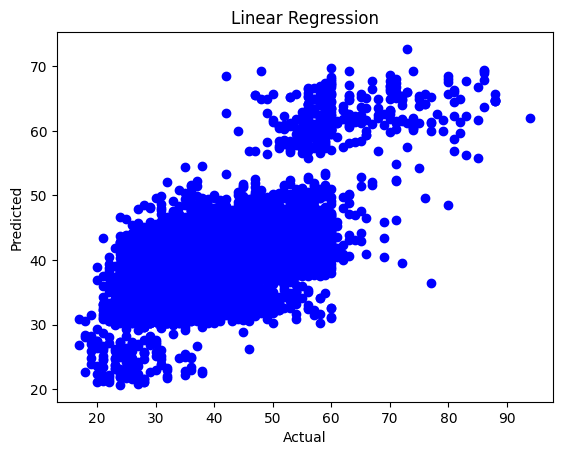

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Drop non-numeric columns and rows with missing values for simplicity
Mydata = Mydata.drop(columns=['duration'])
Mydata = Mydata.dropna()  # Drop rows with missing values

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Assume we want to predict a continuous variable, e.g., 'age'
# If 'age' is not a continuous variable in your dataset, replace it with an actual continuous variable
X = Mydata.drop(columns=['age'])  # Features
y = Mydata['age']                 # Target

# 2. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4. Make Predictions
y_pred = lin_reg.predict(X_val)

# 5. Evaluate the Model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R^2 Score: {r2:.2f}")

# 6. Plot the Results
plt.scatter(y_val, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()


Polynomial Regression - Mean Squared Error: 65.47
Polynomial Regression - R^2 Score: 0.39


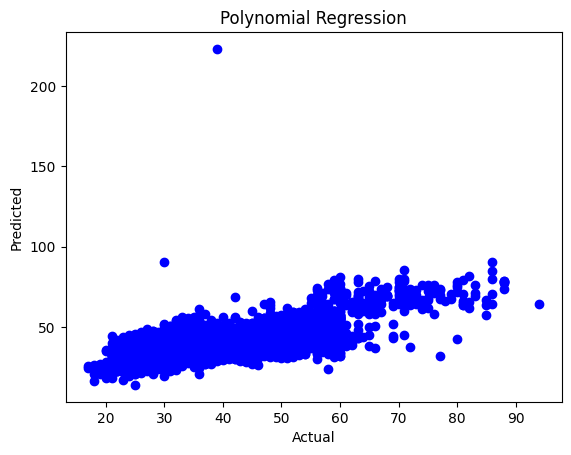

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Read and Preprocess the Data (same as before)
Mydata = pd.read_csv("bank-additional.csv", sep=";")
Mydata = Mydata.drop(columns=['duration'])
Mydata = Mydata.dropna()
Mydata = pd.get_dummies(Mydata, drop_first=True)
X = Mydata.drop(columns=['age'])
y = Mydata['age']

# 2. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Polynomial Regression Model
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
model = make_pipeline(poly_features, LinearRegression())
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_val)

# 5. Evaluate the Model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Polynomial Regression - Mean Squared Error: {mse:.2f}")
print(f"Polynomial Regression - R^2 Score: {r2:.2f}")

# 6. Plot the Results
plt.scatter(y_val, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression')
plt.show()


Lasso Regression - Mean Squared Error: 67.43
Lasso Regression - R^2 Score: 0.37


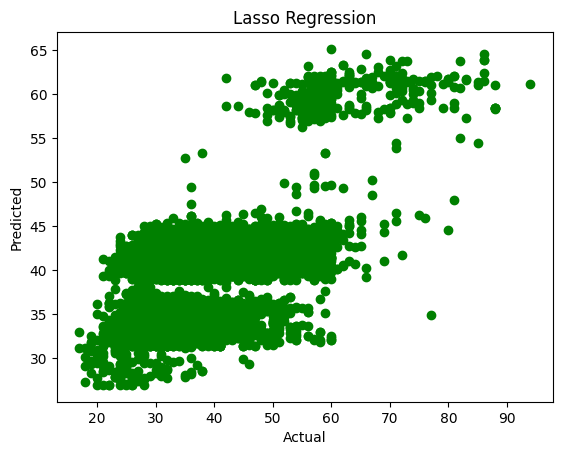

In [ ]:
from sklearn.linear_model import Lasso

# 1. Read and Preprocess the Data (same as before)
Mydata = pd.read_csv("bank-additional.csv", sep=";")
Mydata = Mydata.drop(columns=['duration'])
Mydata = Mydata.dropna()
Mydata = pd.get_dummies(Mydata, drop_first=True)
X = Mydata.drop(columns=['age'])
y = Mydata['age']

# 2. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Lasso Regression Model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# 4. Make Predictions
y_pred_lasso = lasso_reg.predict(X_val)

# 5. Evaluate the Model
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso:.2f}")
print(f"Lasso Regression - R^2 Score: {r2_lasso:.2f}")

# 6. Plot the Results
plt.scatter(y_val, y_pred_lasso, color='green', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.show()


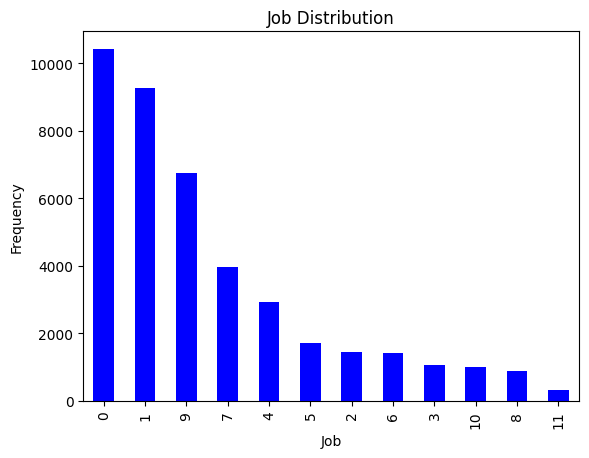

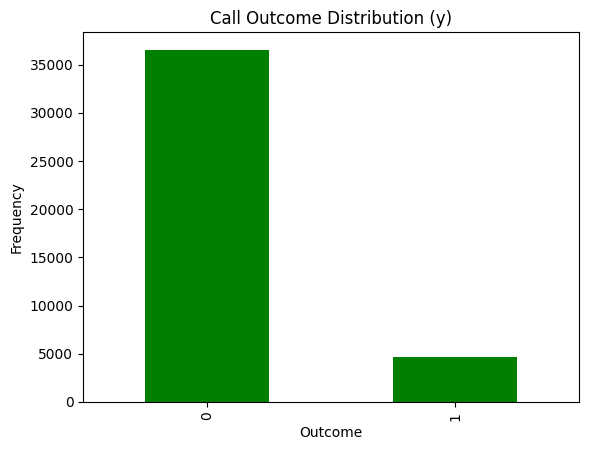

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[

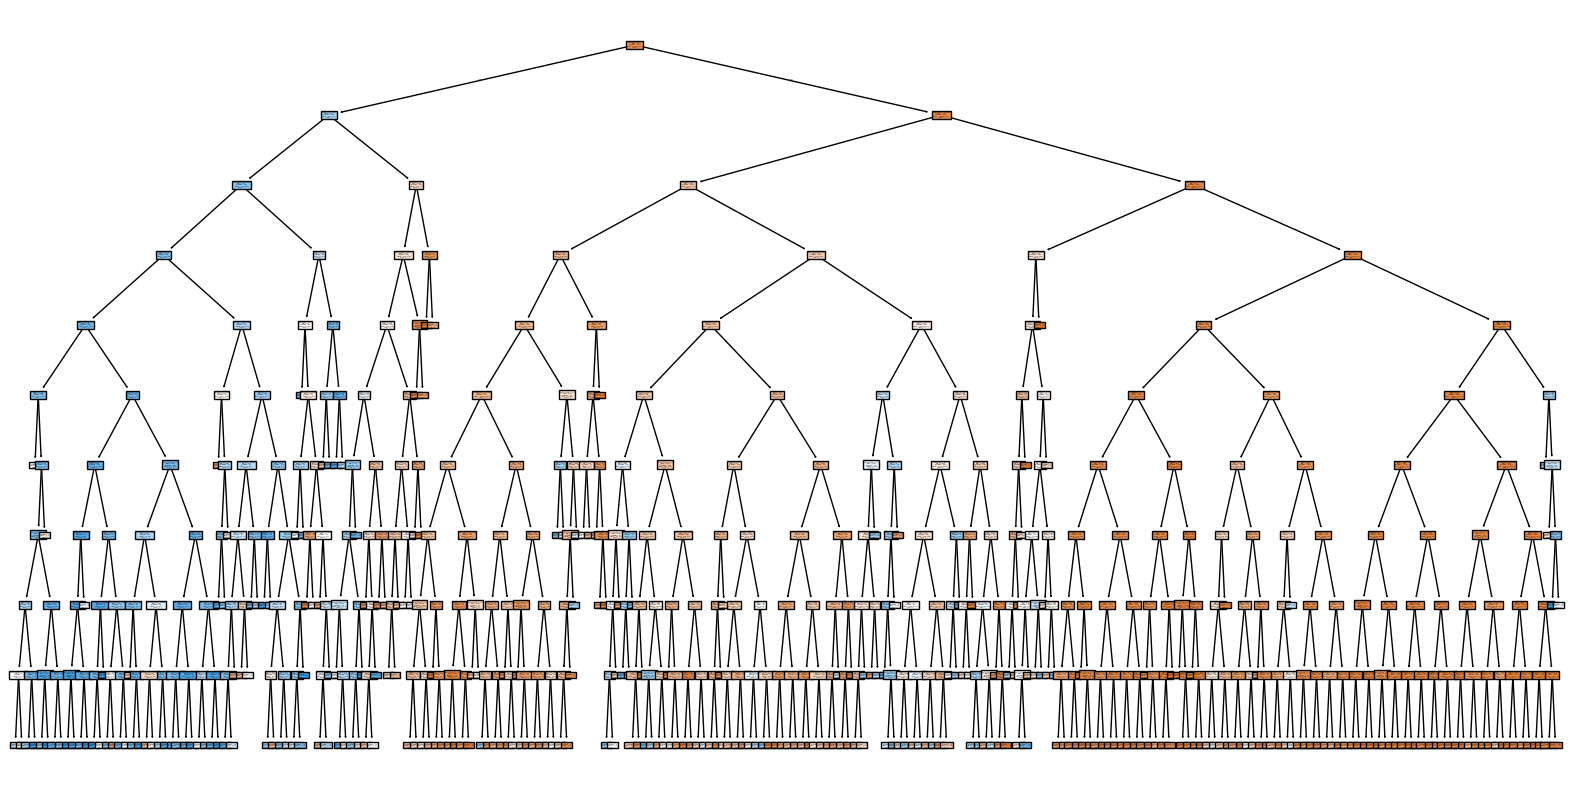

Confusion Matrix:
 [[7160  143]
 [ 726  209]]
Accuracy: 0.8945132313668366
True Positive Rate (TP): 0.2235294117647059
True Negative Rate (TN): 0.9804190058879912
False Positive Rate (FP): 0.019580994112008764
False Negative Rate (FN): 0.7764705882352941


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Read and Visualize the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode categorical variables
label_encoders = {}
for column in Mydata.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    Mydata[column] = le.fit_transform(Mydata[column])
    label_encoders[column] = le

# Plot the 'job' variable
Mydata['job'].value_counts().plot(kind='bar', color='blue')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

# Plot the call outcome variable 'y'
Mydata['y'].value_counts().plot(kind='bar', color='green')
plt.title('Call Outcome Distribution (y)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

# 2. Remove Unnecessary Variable
Mydata = Mydata.drop(columns=['duration'])

# 3. Split the Data into Training and Validation Sets
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build and Tune the Decision Tree Model
# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with n_jobs=1 to avoid multiprocessing issues
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print("Best parameters:", best_params)
mtree = grid_search.best_estimator_

# 5. Display and Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(mtree, feature_names=X_train.columns, class_names=[str(cls) for cls in mtree.classes_], filled=True)
plt.show()

# 6. Evaluate the Model on the Validation Set
Yt = mtree.predict(X_val)
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)
# 7. Calculate Performance Metrics
ac = accuracy_score(y_val, Yt)
tp = conf_matrix[1, 1] / sum(conf_matrix[1, :])  # True positive rate
tn = conf_matrix[0, 0] / sum(conf_matrix[0, :])  # True negative rate
print("Accuracy:", ac)
print("True Positive Rate (TP):", tp)
print("True Negative Rate (TN):", tn)
# 8. Calculate False Positive and Negative Rates
fp = conf_matrix[0, 1] / sum(conf_matrix[0, :])  # False positive rate
fn = conf_matrix[1, 0] / sum(conf_matrix[1, :])  # False negative rate
print("False Positive Rate (FP):", fp)
print("False Negative Rate (FN):", fn)
    

Confusion Matrix:
 [[6727  576]
 [ 507  428]]


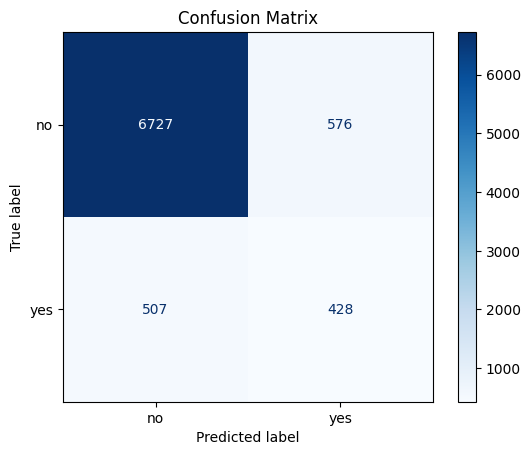

Accuracy: 0.8685360524399126
Precision: 0.4262948207171315
Recall: 0.4577540106951872


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


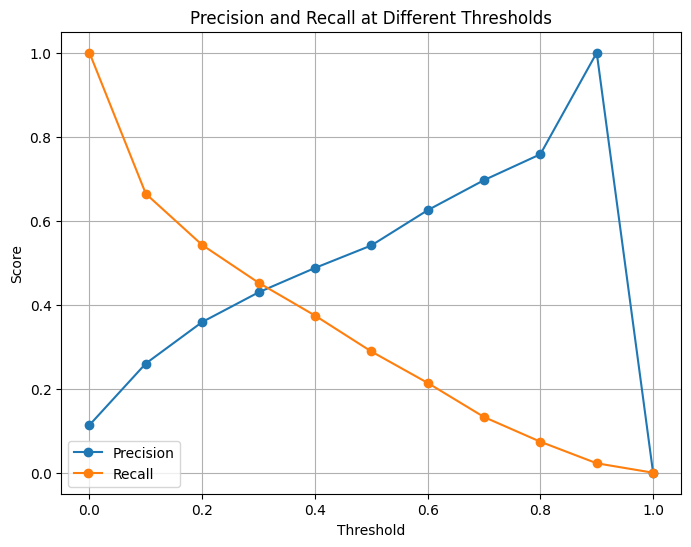

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Random Forest Model with Class Weights
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rforest.fit(X_train, y_train)

# 4. Make Predictions with Threshold Tuning
# Predict probabilities instead of classes
y_proba = rforest.predict_proba(X_val)[:, 1]

# Adjust the threshold for more positive predictions
threshold = 0.3  # Lower threshold means more positives predicted
Yt = (y_proba >= threshold).astype(int)

# 5. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)

# 6. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 7. Calculate and Print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_val, Yt)
precision = precision_score(y_val, Yt)
recall = recall_score(y_val, Yt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# 8. Visualize the Impact of Threshold on Precision and Recall
thresholds = np.arange(0.0, 1.1, 0.1)
precisions = []
recalls = []
for t in thresholds:
    Yt_temp = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_val, Yt_temp))
    recalls.append(recall_score(y_val, Yt_temp))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()



In [3]:
from sklearn.metrics import f1_score

best_threshold = 0.5
best_f1 = 0

for t in np.arange(0.1, 1.0, 0.1):
    Yt_temp = (y_proba >= t).astype(int)
    f1 = f1_score(y_val, Yt_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f'Best Threshold: {best_threshold}, Best F1 Score: {best_f1}')


Best Threshold: 0.30000000000000004, Best F1 Score: 0.440625


In [4]:
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight={0: 1, 1: 2})  # Experiment with different weights
rforest.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 2}, n_jobs=-1, random_state=42)

In [9]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier(scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))
xgboost_model.fit(X_train, y_train)
y_proba_xgb = xgboost_model.predict_proba(X_val)[:, 1]
Yt_xgb = (y_proba_xgb >= threshold).astype(int)

conf_matrix_xgb = confusion_matrix(y_val, Yt_xgb)
print("Confusion Matrix for XGBoost:\n", conf_matrix_xgb)


Confusion Matrix for XGBoost:
 [[4634 2669]
 [ 245  690]]


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


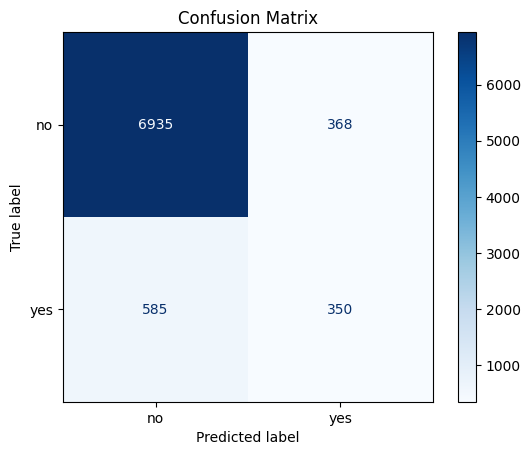

Accuracy: 0.88
Precision: 0.49
Recall: 0.37


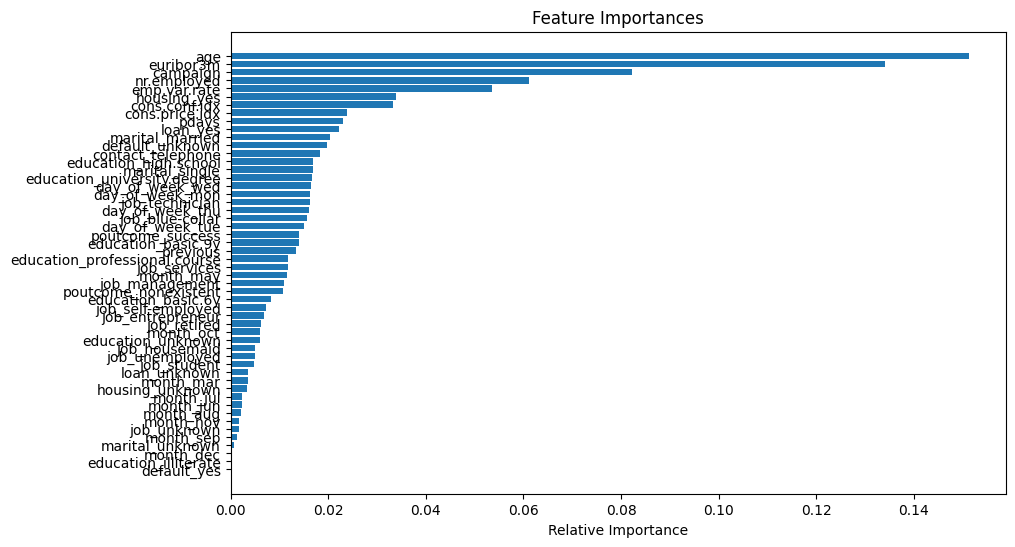

c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


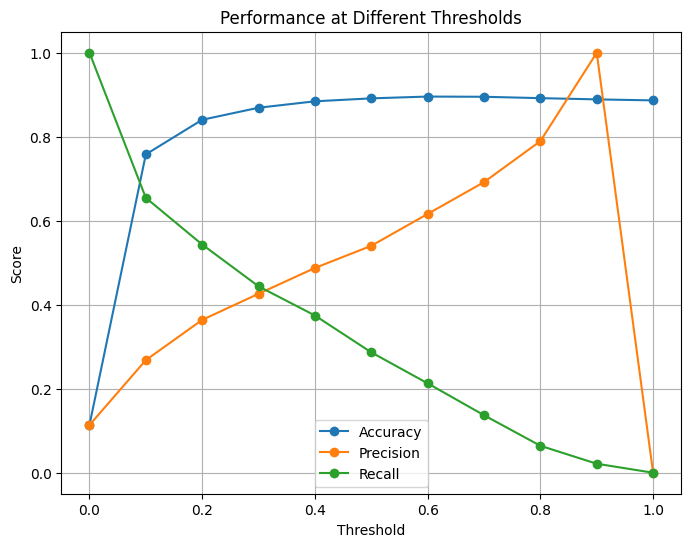

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning with GridSearchCV
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [10, 20, None],      # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required to be at a leaf node
}

# Perform grid search
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Build model with best parameters
best_rforest = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1, class_weight='balanced')
best_rforest.fit(X_train, y_train)

# 4. Make Predictions with Threshold Tuning
# Predict probabilities instead of classes
y_proba = best_rforest.predict_proba(X_val)[:, 1]

# Adjust the threshold for more positive predictions
threshold = 0.4  # Experiment with different thresholds
Yt = (y_proba >= threshold).astype(int)

# 5. Compute Confusion Matrix and Accuracy, Precision, Recall
conf_matrix = confusion_matrix(y_val, Yt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_val, Yt)
precision = precision_score(y_val, Yt)
recall = recall_score(y_val, Yt)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# 6. Visualize Feature Importance
importances = best_rforest.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance")
plt.show()

# 7. Visualize the Impact of Threshold on Accuracy, Precision, and Recall
thresholds = np.arange(0.0, 1.1, 0.1)
accuracies = []
precisions = []
recalls = []
for t in thresholds:
    Yt_temp = (y_proba >= t).astype(int)
    accuracies.append(accuracy_score(y_val, Yt_temp))
    precisions.append(precision_score(y_val, Yt_temp))
    recalls.append(recall_score(y_val, Yt_temp))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


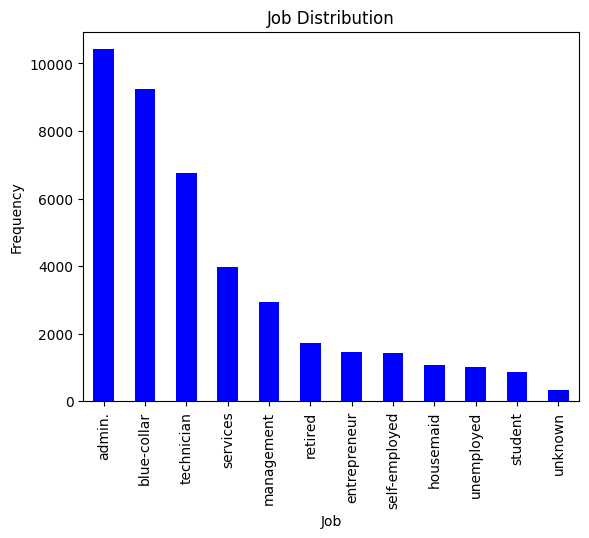

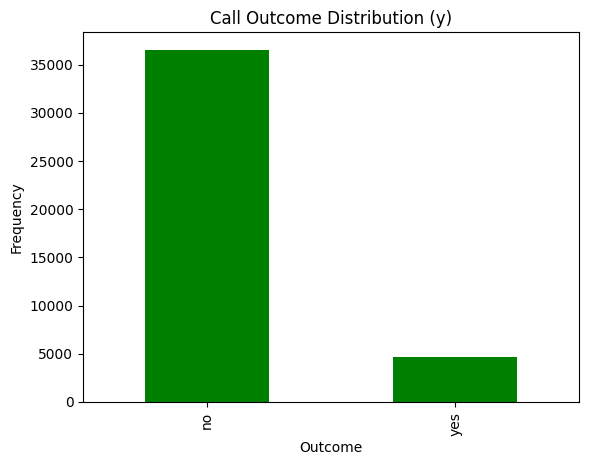

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Recall on validation set: 0.34866310160427805
Weighted Decision Tree Recall: 0.3251336898395722
Recall with threshold 0.3: 0.3582887700534759
Random Forest Recall: 0.28342245989304815
Cross-validated Recall: 0.35195681511470983


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Visualize the Data (optional)
Mydata['job'].value_counts().plot(kind='bar', color='blue')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

Mydata['y'].value_counts().plot(kind='bar', color='green')
plt.title('Call Outcome Distribution (y)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

# 3. Remove Unnecessary Column
Mydata = Mydata.drop(columns=['duration'])

# 4. Handle Categorical Variables
# Convert categorical variables to dummy/indicator variables
Mydata = pd.get_dummies(Mydata, drop_first=True)

# 5. Split the Data into Training and Validation Sets
X = Mydata.drop(columns=['y_yes'])  # Assuming the target variable is 'y_yes' after encoding
y = Mydata['y_yes']  # Target variable, where 'yes' is now encoded as 1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Tune Hyperparameters with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model based on recall
best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on the validation set
Yt_best = best_tree.predict(X_val)

# Evaluate the best model
recall_best = recall_score(y_val, Yt_best)
print("Best Recall on validation set:", recall_best)

# 7. Handle Class Imbalance with class_weight
mtree_weighted = DecisionTreeClassifier(class_weight='balanced', random_state=42)
mtree_weighted.fit(X_train, y_train)

# Make predictions and evaluate recall
Yt_weighted = mtree_weighted.predict(X_val)
recall_weighted = recall_score(y_val, Yt_weighted)

print("Weighted Decision Tree Recall:", recall_weighted)

# 8. Adjust Decision Threshold
y_prob = best_tree.predict_proba(X_val)[:, 1]  # Probabilities for class 'yes'

# Adjust the threshold to, e.g., 0.3 for higher recall
Yt_threshold = (y_prob >= 0.3).astype(int)

# Calculate recall with adjusted threshold
recall_threshold = recall_score(y_val, Yt_threshold)
print("Recall with threshold 0.3:", recall_threshold)

# 9. Use Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict on validation data
Yt_rf = rf.predict(X_val)

# Calculate recall for Random Forest
recall_rf = recall_score(y_val, Yt_rf)
print("Random Forest Recall:", recall_rf)

# 10. Cross-Validation for the Best Model
recall_scores = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='recall')
print("Cross-validated Recall:", recall_scores.mean())


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# 1. Generate Dummy Data
X, y = make_classification(n_samples=1000,  # 1000 samples
                           n_features=10,   # 10 features
                           n_informative=5,  # 5 features that actually contribute to the target
                           n_classes=2,     # Binary classification (0 or 1)
                           weights=[0.6, 0.4],  # 60% class 0, 40% class 1
                           random_state=42)

# Convert the target variable 'y' to a DataFrame for consistency
y = pd.Series(y, name='y')

# 2. Split the Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Tune Hyperparameters with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model based on accuracy
best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on the validation set
Yt_best = best_tree.predict(X_val)

# Evaluate the best model
accuracy_best = accuracy_score(y_val, Yt_best)
print("Best Accuracy on validation set:", accuracy_best)

# 4. Handle Class Imbalance with class_weight
mtree_weighted = DecisionTreeClassifier(class_weight='balanced', random_state=42)
mtree_weighted.fit(X_train, y_train)

# Make predictions and evaluate accuracy
Yt_weighted = mtree_weighted.predict(X_val)
accuracy_weighted = accuracy_score(y_val, Yt_weighted)

print("Weighted Decision Tree Accuracy:", accuracy_weighted)

# 5. Use Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict on validation data
Yt_rf = rf.predict(X_val)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_val, Yt_rf)
print("Random Forest Accuracy:", accuracy_rf)

# 6. Cross-Validation for the Best Model
accuracy_scores = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", accuracy_scores.mean())


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy on validation set: 0.93
Weighted Decision Tree Accuracy: 0.92
Random Forest Accuracy: 0.95
Cross-validated Accuracy: 0.9037500000000002


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 1. Generate an Imbalanced Dataset
X, y = make_classification(n_samples=1000,  # 1000 samples
                           n_features=10,   # 10 features
                           n_informative=5,  # 5 informative features
                           n_classes=2,     # Binary classification
                           weights=[0.9, 0.1],  # 90% class 0, 10% class 1 (imbalanced)
                           random_state=42)

# Convert the target variable 'y' to a DataFrame for consistency
y = pd.Series(y, name='y')

# Check class distribution before balancing
print("Original Class Distribution:\n", y.value_counts())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X_train, y_train)

print("\nClass Distribution After Over-Sampling:\n", pd.Series(y_resampled_over).value_counts())

# 3. Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

print("\nClass Distribution After Under-Sampling:\n", pd.Series(y_resampled_under).value_counts())

# 4. Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After SMOTE:\n", pd.Series(y_resampled_smote).value_counts())


Original Class Distribution:
 y
0    896
1    104
Name: count, dtype: int64

Class Distribution After Over-Sampling:
 y
1    717
0    717
Name: count, dtype: int64

Class Distribution After Under-Sampling:
 y
0    83
1    83
Name: count, dtype: int64

Class Distribution After SMOTE:
 y
1    717
0    717
Name: count, dtype: int64


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Load the data
data = pd.read_csv('bank-additional.csv')

# Check the column names
print("Column Names:", data.columns)

# Assuming the target column is actually named 'Target' (change this based on actual column name)
# Update this with the actual target column name from your dataset
target_column = 'Target'

# Ensure the column exists before proceeding
if target_column not in data.columns:
    raise KeyError(f"Column '{target_column}' not found in the DataFrame.")

# Prepare the data
X = data.drop(target_column, axis=1)  # Features
y = data[target_column]               # Target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_val)[:, 1]

# Adjust the decision threshold
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Example costs
cost_fp = 5  # Cost for a wasted call (False Positive)
cost_fn = 20  # Cost for a missed opportunity (False Negative)

# Cost Analysis
total_cost = (fp * cost_fp) + (fn * cost_fn)
print(f"Total Cost of Marketing Campaign: ${total_cost}")
print(f"False Positives (Wasted Calls): {fp}, False Negatives (Missed Customers): {fn}")

# Evaluate the model's performance
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")


Column Names: Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')


KeyError: "Column 'Target' not found in the DataFrame."

In [27]:
import pandas as pd

# Load the data
data = pd.read_csv('bank-additional.csv')

# Display the column names
print("Column Names:", data.columns)


Column Names: Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Load the data
data = pd.read_csv('bank-additional.csv', sep=';')

# Check column names and prepare the data
target_column = 'y'  # Replace with the actual target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_val)[:, 1]

# Adjust the decision threshold
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

# Convert integer predictions to string labels
y_pred_str = ['yes' if i == 1 else 'no' for i in y_pred]

# Evaluate the model's performance
precision = precision_score(y_val, y_pred_str, pos_label='yes')
recall = recall_score(y_val, y_pred_str, pos_label='yes')
conf_matrix = confusion_matrix(y_val, y_pred_str)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")
print("Confusion Matrix:\n", conf_matrix)


Precision: 0.54, Recall: 0.79
Confusion Matrix:
 [[6673  630]
 [ 197  738]]


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bank-additional.csv', sep=';')

# Inspect the data
print(data.head())
print(data.columns)


# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Handle missing values (if any)
# Assuming no missing values for simplicity; if there are, use data.fillna() or similar methods.

# Define features and target
X = data.drop('y_yes', axis=1)  # Assuming 'y_yes' is the target column after one-hot encoding
y = data['y_yes']  # Assuming binary classification with 'yes' as positive response

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict probabilities
y_prob = best_model.predict_proba(X_val)[:, 1]

# Adjust the threshold for cost efficiency
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Cost calculation
cost_fp = 5  # Cost per False Positive
cost_fn = 20  # Cost per False Negative

total_cost = (fp * cost_fp) + (fn * cost_fn)
print(f"Total Cost of Marketing Campaign: ${total_cost}")

# Evaluate performance
print("Confusion Matrix:\n", conf_matrix)
print("Precision and Recall:")
print(classification_report(y_val, y_pred))


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy:", rf_model.score(X_val, y_val))

Random Forest Accuracy: 0.9119932022335518


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", gb_model.score(X_val, y_val))

Gradient Boosting Accuracy: 0.9196406894877397


In [7]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", xgb_model.score(X_val, y_val))

XGBoost Accuracy: 0.9186695799951444


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example with Random Forest and Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Grid Search Accuracy:", grid_search_rf.best_score_)


In [10]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]
# Stacking Classifier
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# Train and evaluate
stack_model.fit(X_train, y_train)
print("Stacking Model Accuracy:", stack_model.score(X_val, y_val))

Stacking Model Accuracy: 0.9174556931294003


In [11]:
from sklearn.model_selection import cross_val_score

# Example with Random Forest and cross-validation
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5)
print("Cross-validated Accuracy:", cv_scores.mean())

Cross-validated Accuracy: 0.9112898330804249


In [12]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_val)
print("Neural Network Accuracy:", mlp_model.score(X_val, y_val))

Neural Network Accuracy: 0.8879582422918184


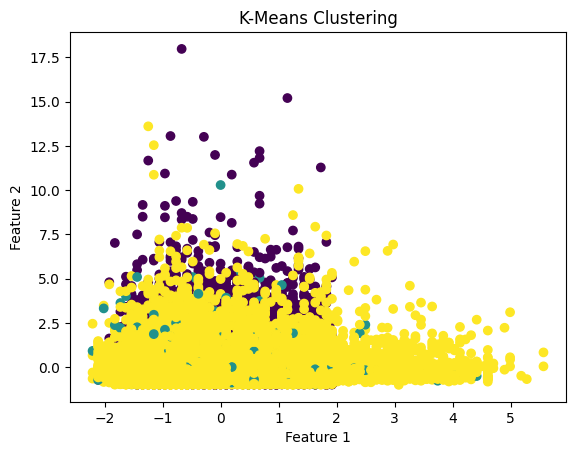

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('bank-additional.csv', sep=';')

# Preprocess the data (convert categorical variables to numerical)
data = pd.get_dummies(data, drop_first=True)
# Feature scaling (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_
# Visualize the clusters (using only two dimensions for simplicity)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


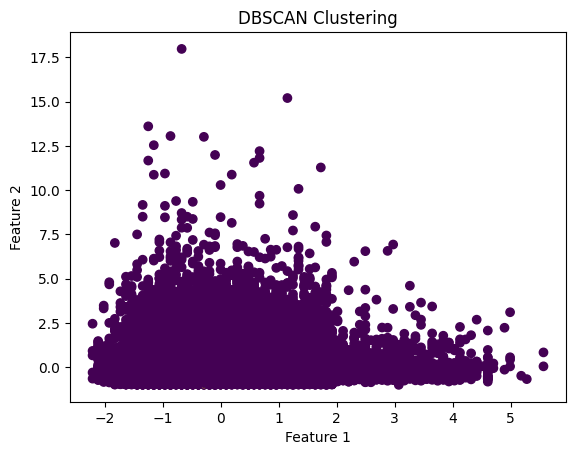

In [15]:
from sklearn.cluster import DBSCAN

# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data_scaled)

# Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a linearly separable dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0, class_sep=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
# Predict on the training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Training Accuracy: 99.75%
Test Accuracy: 99.50%


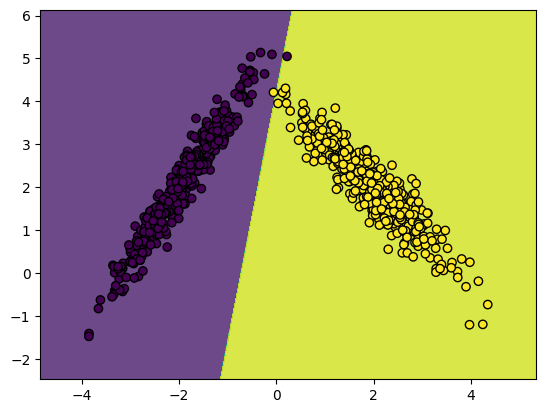

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the decision boundary plotting function
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, model)


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


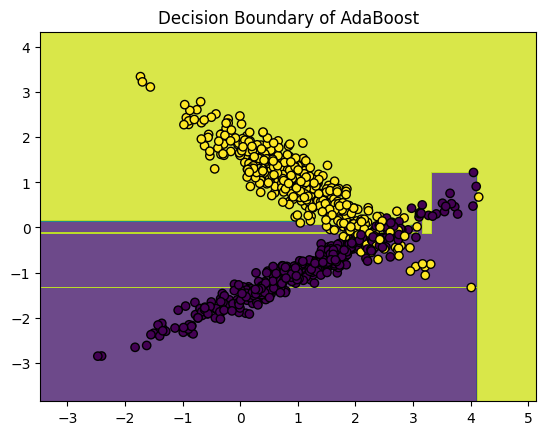

Training Accuracy: 92.62%
Test Accuracy: 89.50%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize AdaBoost with a decision tree as the base estimator
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                         n_estimators=50, random_state=42)

# Fit the model
ada.fit(X_train, y_train)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary of AdaBoost")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, ada)
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load a dataset (Iris dataset for example)
data = load_iris()
X = data.data
y = data.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the base learner (weak learner) - a Decision Tree with a maximum depth of 1
base_learner = DecisionTreeClassifier(max_depth=1)
# Initialize AdaBoost with the base learner
adaboost = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1.0, random_state=42)
# Train the AdaBoost model
adaboost.fit(X_train, y_train)
# Make predictions on the test set
y_pred = adaboost.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


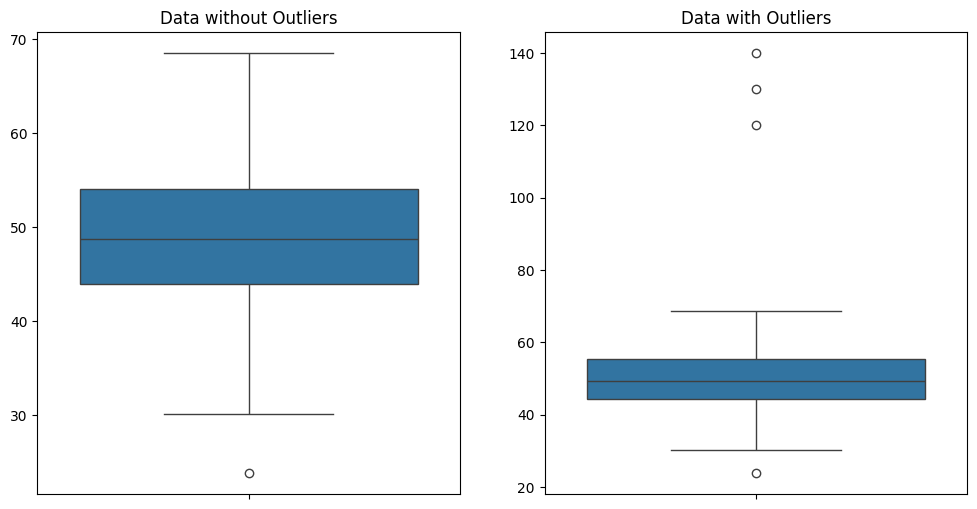

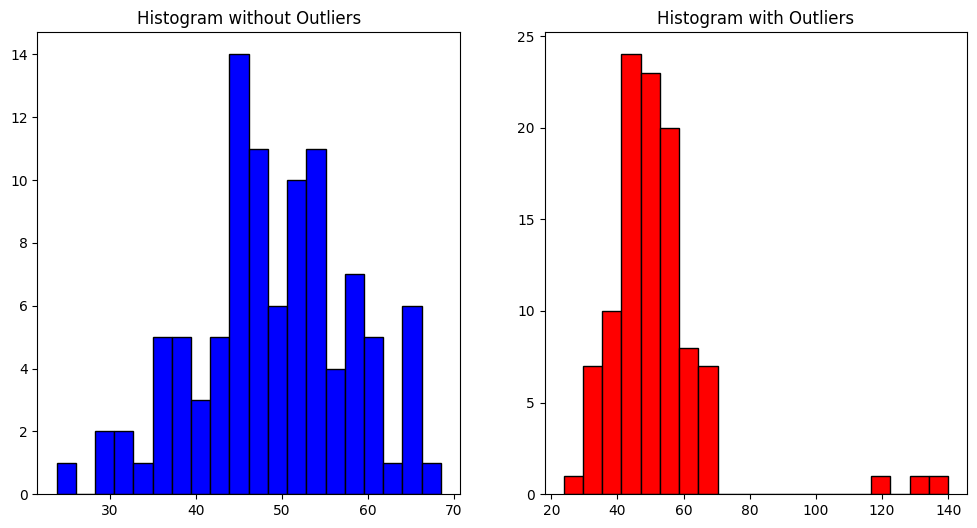

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the random seed for reproducibility
np.random.seed(42)
# Generate some data (normal distribution)
data = np.random.normal(loc=50, scale=10, size=100)
# Introduce outliers
outliers = np.array([120, 130, 140])
# Combine the data
data_with_outliers = np.concatenate([data, outliers])
# Create a figure with subplots
plt.figure(figsize=(12, 6))
# Plot data without outliers
plt.subplot(1, 2, 1)
sns.boxplot(data)
plt.title('Data without Outliers')
# Plot data with outliers
plt.subplot(1, 2, 2)
sns.boxplot(data_with_outliers)
plt.title('Data with Outliers')
# Show the plots
plt.show()
# Create a figure with subplots
plt.figure(figsize=(12, 6))
# Plot histogram without outliers
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, color='blue', edgecolor='black')
plt.title('Histogram without Outliers')
# Plot histogram with outliers
plt.subplot(1, 2, 2)
plt.hist(data_with_outliers, bins=20, color='red', edgecolor='black')
plt.title('Histogram with Outliers')
# Show the plots
plt.show()


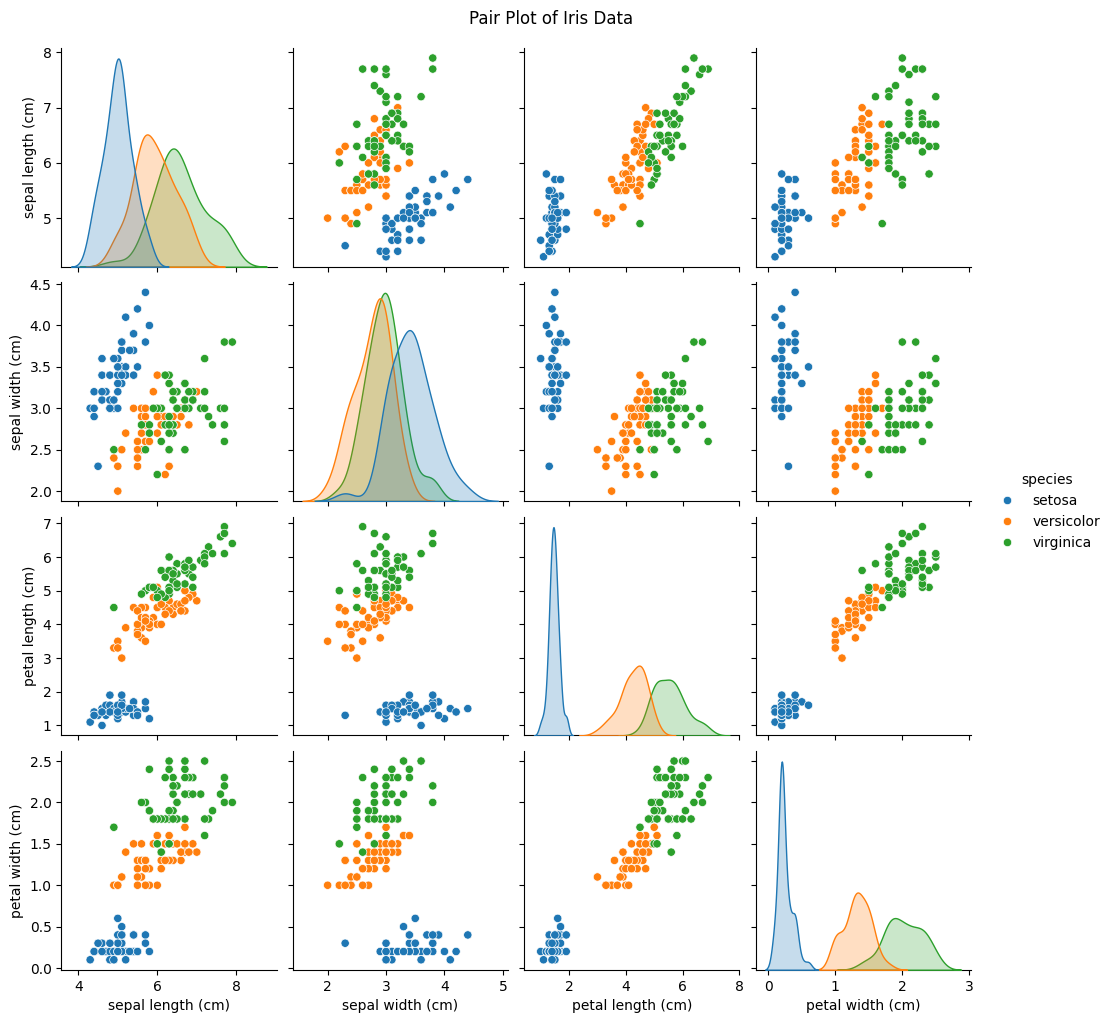

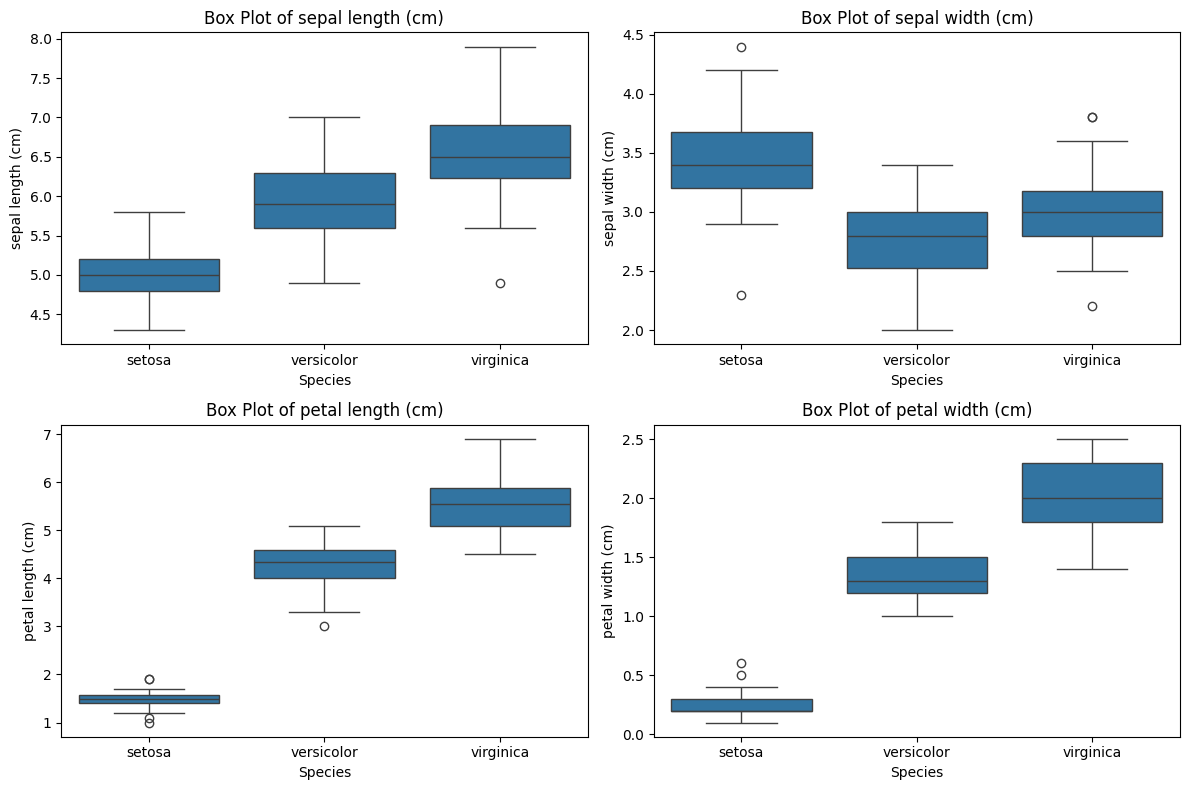

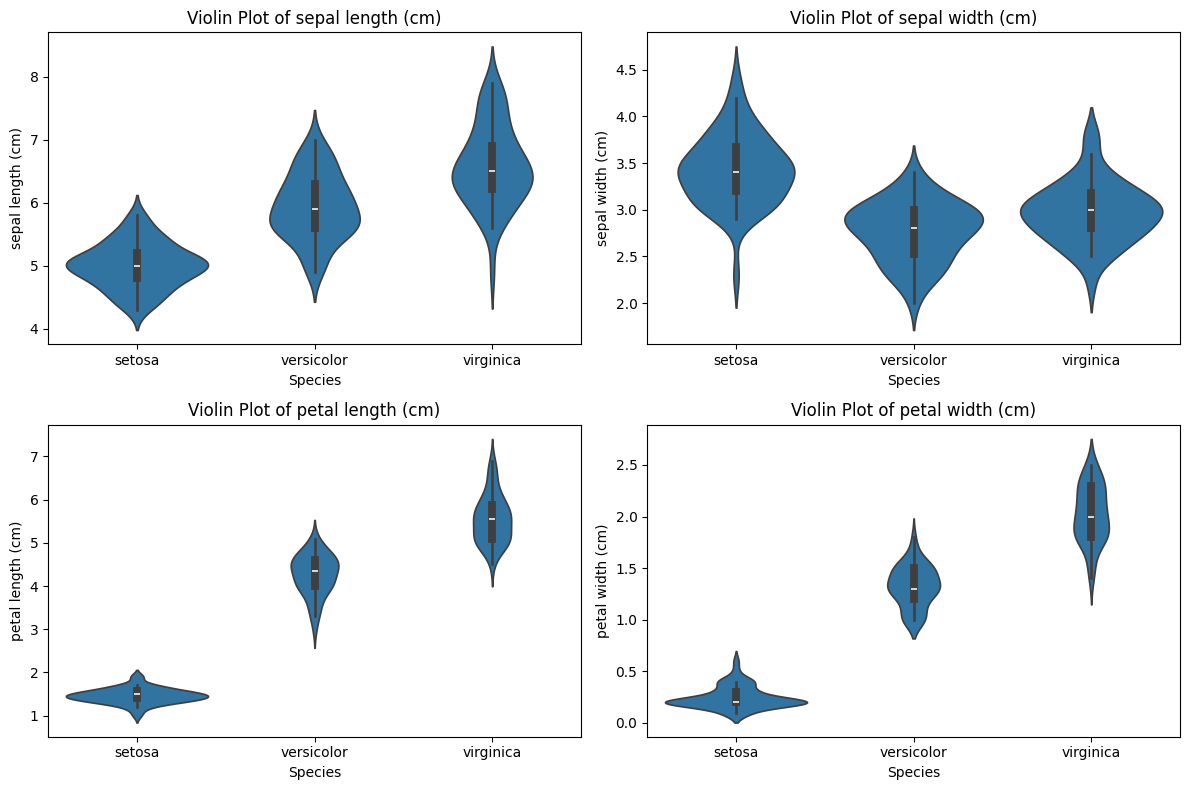

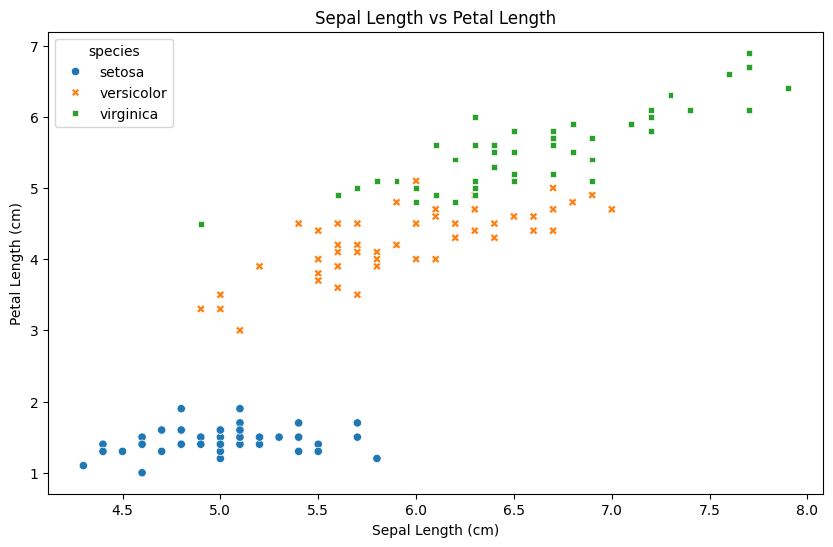

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
# Load the iris dataset
iris = load_iris()

# Convert to a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.suptitle("Pair Plot of Iris Data", y=1.02)
plt.show()
plt.figure(figsize=(12, 8))

for i, column in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=iris_df)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))

for i, column in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=column, data=iris_df)
    plt.title(f'Violin Plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=iris_df, style='species')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 100.00%


In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [1]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


NameError: name 'y_test' is not defined

In [3]:
from sklearn.metrics import accuracy_score

# Example data (replace these with your actual data)
y_test = [0, 1, 1, 0, 1, 0, 1, 0]  # True labels
y_pred = [0, 1, 0, 0, 1, 0, 1, 1]  # Predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 75.00%


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv('bank-additional.csv')
# Print the total number of data points (rows)
total_data_points = len(df)
print(f'Total data points: {total_data_points}')

Total data points: 41188


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Print a preview of the dataset
print("Preview of the dataset:")
print(Mydata.head())

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# Print the dataset after preprocessing
print("\nDataset after preprocessing:")
print(Mydata.head())

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and validation sets
print("\nShapes of the training and validation sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# 3. Build and Train the Random Forest Model
rforest = RandomForestClassifier(random_state=42, n_jobs=-1)
rforest.fit(X_train, y_train)

# 4. Evaluate the Model
Yt = rforest.predict(X_val)
conf_matrix = confusion_matrix(y_val, Yt)
accuracy = accuracy_score(y_val, Yt)

# Print Random Forest results
print("\nConfusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

# Print feature importances
feature_importances = pd.DataFrame(rforest.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Preview of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx